# 영문 형태소 분석기
## 설치 - NLTK
- PPT 참조

In [36]:
# !pip install nltk

In [39]:
# nltk.download()

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

## 토큰화

In [5]:
tokens=word_tokenize("Hello World, This is a dog.")
tokens               

['Hello', 'World', ',', 'This', 'is', 'a', 'dog', '.']

## 정제
- 특수문자 제거 >> , . !!!

In [8]:
words=[]
for word in tokens:
    if word.isalpha():   # 숫자, 구두점, 특수문자 모두 제거
        words.append(word)
words

['Hello', 'World', 'This', 'is', 'a', 'dog']

## 불용어 
- stopword 문장에 많이 등장하지만 큰 의미가 없는 단어들
- '이', '그', '저', '것', '수', '등', '들', '및', '에서', '의', '에게', '하지만', '그리고', '또한'
- 'a', 'am', 'this'

In [11]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [13]:
stop_words_list=stopwords.words('english')
print("불용어 개수:", len(stop_words_list), type(stop_words_list))
print("불용어 10개 출력:", stop_words_list[:10])
print("불용어 10개 출력:", stop_words_list[-10:])

불용어 개수: 198 <class 'list'>
불용어 10개 출력: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']
불용어 10개 출력: ['y', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've"]


In [32]:
exam="Family is not an important thing. It's everything."
tokens=word_tokenize(exam)
print(tokens)

# 특수문제 제거
exam_words=[]
for word in tokens:
    if word.isalpha():
        exam_words.append(word)
print(exam_words)

# 불용어
stop_words=set(stopwords.words('english'))    # set 저장 / 속도, 중복값
reslut=[]
for word in exam_words:
    if word not in stop_words:
        reslut.append(word)
print(reslut)

# 정수 인덱싱
token=Tokenizer()
token.fit_on_texts(reslut)  
seq=token.texts_to_sequences(reslut)
print(seq)
print("\n", token.word_index)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'is', 'not', 'an', 'important', 'thing', 'It', 'everything']
['Family', 'important', 'thing', 'It', 'everything']
[[1], [2], [3], [4], [5]]
{'family': 1, 'important': 2, 'thing': 3, 'it': 4, 'everything': 5}


## 문장 토큰화
- 단어 토큰화, 문장 토큰화

In [31]:
text="This is a dog. This is a dog"
print(word_tokenize(text))
print(sent_tokenize(text))

['This', 'is', 'a', 'dog', '.', 'This', 'is', 'a', 'dog']
['This is a dog.', 'This is a dog']


# 한글 형태소 분석기
- KoNLpy(코엔엘파이)
    - 설치 https://wikidocs.net/22488
- Kiwi 형태소 분석기
- Bareun 바른 형태소 분석기

## 설치 - Kiwi

In [91]:
# !pip install kiwipiepy

In [3]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

### 토큰화, 정제, 불용어

In [6]:
# 토큰화
kiwi=Kiwi()
kor_tokens=kiwi.tokenize("안녕하세요!!! 형태소 분석기 키위입니다.")
kor_tokens

[Token(form='안녕', tag='NNG', start=0, len=2),
 Token(form='하', tag='XSA', start=2, len=1),
 Token(form='세요', tag='EF', start=3, len=2),
 Token(form='!!!', tag='SF', start=5, len=3),
 Token(form='형태소', tag='NNG', start=9, len=3),
 Token(form='분석기', tag='NNG', start=13, len=3),
 Token(form='키위', tag='NNG', start=17, len=2),
 Token(form='이', tag='VCP', start=19, len=1),
 Token(form='ᆸ니다', tag='EF', start=19, len=3),
 Token(form='.', tag='SF', start=22, len=1)]

- tag="품사", start="글자위치", len="길이"
- 세종 품사 태그(SKKU POS Tags)**는 다음과 같이 총 60개
    - np:명사, vv:동사, jx:조사, mag:부사, va:형용사
    - https://konlpy.org/ko/latest/api/konlpy.tag/

In [9]:
# 정제 >> 구두점 제거
kor_words=[]  
for word in kor_tokens:
    if word.form.isalpha():    # 문자로 이루어진~~
        kor_words.append(word.form)
print("구두점 제거된 토큰:", kor_words)

구두점 제거된 토큰: ['안녕', '하', '세요', '형태소', '분석기', '키위', '이', 'ᆸ니다']


In [11]:
# 불용어 관리를 위한 Stopwords 클래스도 제공합니다.
stopword=Stopwords()
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords=stopword)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

In [163]:
# normalize_coda 옵션을 사용하면 덧붙은 받침 때문에 분석이 깨지는 경우를 방지할 수 있습니다.
kiwi.tokenize("ㅋㅋㅋ 이런 것도 분석이 될까욬ㅋㅋ?", normalize_coda=True)  # 노멀라이즈 코다

[Token(form='ㅋㅋㅋ', tag='SW', start=0, len=3),
 Token(form='이런', tag='MM', start=4, len=2),
 Token(form='것', tag='NNB', start=7, len=1),
 Token(form='도', tag='JX', start=8, len=1),
 Token(form='분석', tag='NNG', start=10, len=2),
 Token(form='이', tag='JKC', start=12, len=1),
 Token(form='되', tag='VV', start=14, len=1),
 Token(form='ᆯ까요', tag='EF', start=14, len=3),
 Token(form='ㅋㅋㅋ', tag='SW', start=16, len=3),
 Token(form='?', tag='SF', start=19, len=1)]

# 네이버 쇼핑 리뷰 감성 분류

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

import tensorflow as tf
from tensorflow import keras  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

import re
from collections import Counter
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from tqdm import tqdm

## 데이터 로드
- 네이버 쇼핑 리뷰 데이터 https://github.com/bab2min/corpus/tree/master/sentiment
- 20만개 데이터

In [29]:
data=pd.read_table('./Data/naver_shopping.txt', names=['평점', '리뷰'])
data.shape

(200000, 2)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   평점      200000 non-null  int64 
 1   리뷰      200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [33]:
data.head()

,평점,리뷰
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [35]:
data['평점'].value_counts()

평점
5    81177
2    63989
1    36048
4    18786
Name: count, dtype: int64

In [37]:
# 평점이 3보다 크면 1, 그렇지 않으면 0
data['긍부정']=np.where(data['평점'] > 3, 1, 0)   
data.head()

,평점,리뷰,긍부정
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [39]:
# 중복 체크
data['평점'].nunique(), data['리뷰'].nunique(), data['긍부정'].nunique()

(4, 199908, 2)

In [41]:
data['평점'].value_counts()

평점
5    81177
2    63989
1    36048
4    18786
Name: count, dtype: int64

In [43]:
data['긍부정'].value_counts()

긍부정
0    100037
1     99963
Name: count, dtype: int64

- drop_duplicates(): 중복된 행을 제거하는 함수
    - subset=['reviews']: 'reviews' 열을 기준으로 중복 여부 판단
    - inplace=True: 원본 data를 직접 수정 (새 객체를 반환하지 않음)

In [46]:
# reviews 열에서 중복인 내용이 있다면 중복 제거
# 중복되는 내용 삭제 >> 완전히 동일한 리뷰가 여러 번 존재하는 경우, 학습이 편향

data.drop_duplicates(subset=['리뷰'], inplace=True)  # 드랍 듀플리케이츠
data.shape

(199908, 3)

## 데이터 정제
- 한글과 공백을 제외하고 모두 제거

### 정규화
- re.sub(pattern, replacement, string):
    - 정규 표현식 pattern에 해당하는 부분을 replacement로 바꿔주는 함수
- r'[^a-zA-Z ]':
    - 정규 표현식 패턴
        - [^...]: 괄호 안의 문자들을 제외한 모든 문자
        - a-zA-Z: 영문자 (소문자 + 대문자)
        - 공백 ' ' 포함
        - 결론] 영문자와 공백을 제외한 모든 문자
    - '': 빈 문자열로 대체
    - eng_text: 처리할 문자열 (영어 문장이 담긴 변수)

In [50]:
eng_text='do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


- https://www.unicode.org/charts/PDF/U3130.pdf
- https://www.unicode.org/charts/PDF/UAC00.pdf
- "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]": 한글과 공백을 제외한 모든 문자
- "": 즉, 빈 문자열로 대체 → 추후 제거한다는 뜻
- regex=True: 정규표현식으로 인식하라는 옵션

In [53]:
data['리뷰']=data['리뷰'].str.replace(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', regex=True)

In [55]:
data['리뷰']=data['리뷰'].replace('', np.nan)  
print(data.isnull().sum())

평점     0
리뷰     0
긍부정    0
dtype: int64


### 토큰화
- 불용어 제거

In [58]:
stopwords=['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', 
           '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [60]:
kiwi=Kiwi()

train=[]
for sentence in tqdm(data['리뷰']):  # 리뷰 하나씩 반복
    tokens=kiwi.tokenize(sentence)  # 형태소 분석으로 토큰화
    
    filtered_tokens=[]              # 불용어 제거된 토큰을 저장할 리스트
    for token in tokens:            # 각 토큰에 대해
        if token.form not in stopwords:  # 불용어가 아니면
            filtered_tokens.append(token.form)  # 리스트에 추가

    train.append(filtered_tokens)  # 결과를 전체 학습 데이터에 추가

100%|█████████████████████████████████████████████████████████████████████████| 199908/199908 [04:28<00:00, 743.81it/s]


In [64]:
train[0]

['배', '공', '빠르', '굿']

In [66]:
# 띄어쓰기 기준으로 다시 문자열로 합치는 작업
data['토큰화리뷰']=[' '.join(tokens) for tokens in train]

In [69]:
data.head()

,평점,리뷰,긍부정,토큰화리뷰
0,5,배공빠르고 굿,1,배 공 빠르 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0,택배 엉망 네요 ᆼ 저희 집 밑 층 말 없이 놔두
2,5,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1,아주 좋 어요 바지 정말 좋 어서 개 더 구매 었 어요 가격 대 박 ᆸ니다 바느질 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...,0,선물 용 으로 빨리 받 어서 전달 었 어야 상품 었 는데 머 그 컵 만 오 어서 당...
4,5,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,민트 색상 예쁘 어요 옆 손잡이 거 용도 로 사용 되 네요 ㅎㅎ


### 긍부정 단어 빈도수

In [72]:
# 긍부정 단어 빈도수 
# 부정 리뷰만 필터링 → '토큰화리뷰' 열만 추출
negative_words=np.hstack(data[data['긍부정']==0]['토큰화리뷰'].values)
positive_words=np.hstack(data[data['긍부정']==1]['토큰화리뷰'].values)

negative_word_count=Counter(negative_words)   # 빈도수(출현 횟수) 계산
positive_word_count=Counter(positive_words)

In [73]:
negative_word_count.most_common(20)   # 빈도수 

[('재 구매', 26),
 ('배송 너무 느리 어요', 17),
 ('그냥 그렇 어요', 9),
 ('좋 어요', 9),
 ('배송 빠르 좋 어요', 9),
 ('배송 빠르 어요', 8),
 ('생각 보다 별로 네요', 7),
 ('잘 받 었 습니다', 7),
 ('그저 그렇 어요', 7),
 ('그저 그렇 네요', 7),
 ('배송 겁나 느리 ᆷ', 7),
 ('별로 에요', 7),
 ('배송 너무 느리 ᆸ니다', 7),
 ('별로', 6),
 ('사이즈 작 어요', 6),
 ('딱 가격 만큼 ᆸ니다', 6),
 ('별루 ᆸ니다', 6),
 ('배송 느리 ᆷ', 5),
 ('냄새 심하 어요', 5),
 ('배송 너무 늦 네요', 5)]

In [76]:
positive_word_count.most_common(20)

[('재 구매', 29),
 ('좋 어요', 16),
 ('좋 습니다', 9),
 ('만족 ᆸ니다', 8),
 ('감사 ᆸ니다', 8),
 ('배송 빠르 어요', 7),
 ('굿', 6),
 ('조아요', 6),
 ('잘 받 었 습니다', 6),
 ('좋 네요', 5),
 ('빠르 ᆫ 배송 감사 ᆸ니다', 5),
 ('배송 빠르 네요', 5),
 ('재 구매 배송 빠르 좋 어요', 5),
 ('배송 빠르 좋 네요', 5),
 ('맘 어요', 4),
 ('괜찮 어요', 4),
 ('재 구매 빠르 ᆫ 배송 감사 ᆸ니다', 4),
 ('맛있 어요', 4),
 ('배송 빠르 좋 어요', 4),
 ('착용감 좋 어요', 4)]

## 학습 & 테스트 데이터셋 분리

In [79]:
train_data, test_data=train_test_split(data, test_size=0.25, random_state=42)
train_data.shape, test_data.shape

((149931, 4), (49977, 4))

In [81]:
X_train=train_data['토큰화리뷰'].values
Y_train=train_data['긍부정'].values

X_test=test_data['토큰화리뷰'].values
Y_test=test_data['긍부정'].values

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((149931,), (149931,), (49977,), (49977,))

## 정수 인코딩 

In [84]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
total_cnt=len(tokenizer.word_index)
total_cnt  # 단어의 수

38266

In [86]:
# 등장 횟수가 1회인 단어들은 자연어 처리에서 배재
threshold=2       
# total_cnt=len(tokenizer.word_index)   # 단어의 수
rare_cnt=0                            # 등장빈도수가 threshold보다 작은 단어의 수
rare_freq=0                           # 등장빈도수가  threshold보다 작은 단어의 등장 빈도수의 총합
total_freq=0                          # 훈련데이터의 전체 단어 빈도수 총합

for key, value in tokenizer.word_counts.items():  # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    if(value < threshold):          # 등장빈도수가 threshold보다 작은 단어의 수
        rare_cnt += 1
        rare_freq += value
    
    total_freq += value             # 빈도수 총합

In [87]:
print("단어집합(vocabulary)의 크기:", total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold-1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어집합(vocabulary)의 크기: 38266
등장 빈도가 1번 이하인 희귀 단어의 수: 21482
단어 집합에서 희귀 단어의 비율: 56.138608686562485
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.8595237609386022


In [90]:
vocab_size=total_cnt - rare_cnt + 2   # 패딩, OOV(Out Of Vocabulary)
vocab_size     # 빈도순위

16786

- OOV : 훈련에 없는 단어 포함시 토큰으로 대체
    - 텍스트 시퀀스를 정수 시퀀스로 변환합니다. 정수 인코딩 과정에서 이보다 큰 숫자가 부여된 단어들은 OOV로 변환

In [93]:
tokenizer=Tokenizer(num_words=vocab_size, oov_token='OOV')   # 훈련 데이터에 없는 단어가 테스트 데이터 등에 나타날 경우
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [95]:
print(X_train[:3])

[[67, 1729, 298, 1946, 5, 13, 50, 70, 2, 234, 171, 144, 159, 2, 2562, 5, 692, 7, 71, 61, 132, 44, 969, 343, 162, 8, 2], [2095, 300, 52, 1947, 3905, 2563, 317, 1947, 313, 78, 4, 32, 444, 7], [46, 17, 1043, 113, 42, 1981, 160, 11, 16, 1409, 3, 2, 1203, 6, 128, 260, 4, 23, 58, 160, 128, 11, 1409, 7, 116, 13, 15, 489, 323, 124, 143]]


In [97]:
print('리뷰의 최대 길이 :', max(len(review) for review in X_train))
print('리뷰의 평균 길이 :', sum(map(len, X_train))/len(X_train))

리뷰의 최대 길이 : 77
리뷰의 평균 길이 : 16.669608019689058


In [99]:
max_len=80
X_train=sequence.pad_sequences(X_train, maxlen=max_len)
X_test=sequence.pad_sequences(X_test, maxlen=max_len)

## 학습 및 평가

In [101]:
model=Sequential()
model.add(keras.layers.Input(shape=(max_len, )))
model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=100))
model.add(keras.layers.LSTM(128, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [102]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, Y_train, epochs=3, callbacks=[es], batch_size=64, validation_split=0.2)   # epochs=15

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 217s 114ms/step - accuracy: 0.8438 - loss: 0.3656 - val_accuracy: 0.9052 - val_loss: 0.2524
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 230s 123ms/step - accuracy: 0.9170 - loss: 0.2305 - val_accuracy: 0.9107 - val_loss: 0.2398
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 246s 131ms/step - accuracy: 0.9233 - loss: 0.2131 - val_accuracy: 0.9205 - val_loss: 0.2237


In [126]:
model.evaluate(X_test, Y_test)

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9191 - loss: 0.2246


[0.2280949056148529, 0.9175620675086975]

## 테스트 

In [165]:
def sentiment_predict(new_sentence):
  new_sentence=re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)           # 정규 표현
  new_sentence=[token.form for token in kiwi.tokenize(new_sentence)]     # 토근화
  new_sentence=[word for word in new_sentence if word not in stopwords]  # 불용어 제거
  encoded=tokenizer.texts_to_sequences([new_sentence])                   # 정수 인코딩
  pad_new=sequence.pad_sequences(encoded, maxlen=max_len)                         # 패딩

  score=float(model.predict(pad_new)[0][0])
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [167]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
97.30% 확률로 긍정 리뷰입니다.


In [169]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
99.82% 확률로 부정 리뷰입니다.


In [171]:
sentiment_predict('판매자님... 너무 짱이에요.. 대박나삼')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
96.06% 확률로 긍정 리뷰입니다.


In [173]:
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
93.09% 확률로 부정 리뷰입니다.


# 네이버 영화 리뷰 감성 분류
- 데이터 : https://github.com/e9t/nsmc/

## 데이터 로드

In [177]:
data=pd.read_table('./Data/ratings.txt')
data.shape

(200000, 3)

In [179]:
data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


## 데이터 전처리

In [184]:
# 중복 유무 확인
data['document'].nunique(), data['label'].nunique()  

(194543, 2)

In [186]:
# X: 중복되는 내용 삭제
data.drop_duplicates(subset=['document'], inplace=True)

In [187]:
# Y: 빈도수
data['label'].value_counts()

label
0    97277
1    97267
Name: count, dtype: int64

In [188]:
# 빈 값 처리
data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [189]:
data.dropna(inplace=True)

In [190]:
data.shape

(194543, 3)

## 데이터 정제
### 정규화

In [199]:
# 한글과 공백을 제외하고 모두 제거
data['document']=data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True) 

In [201]:
data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [203]:
# 네이버 영화 리뷰는 한글이 아니더라도 영어, 숫자, 특수문자로도 
# 리뷰를 업로드 가능하므로 빈값 도출 - 하나 이상의 공백 있으면
data['document']=data['document'].str.replace('^ +', "", regex=True)   

In [205]:
# 하나 이상의 공백 있으면 >> Null 변경 삭제
data['document']=data['document'].replace('', np.nan)   

In [207]:
data.dropna(inplace=True)

In [208]:
data.shape

(193518, 3)

### 토큰화
- 불용어 제거

In [212]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [214]:
kiwi=Kiwi()

data_list=[]
for sentence in tqdm(data['document']):
    tokens=kiwi.tokenize(sentence)
    filtered_tokens=[token.form for token in tokens if token.form not in stopwords]
    data_list.append(filtered_tokens)

100%|█████████████████████████████████████████████████████████████████████████| 193518/193518 [04:57<00:00, 649.99it/s]


In [229]:
data['token_documnet']=[' '.join(tokens) for tokens in data_list]
data.head()

,id,document,label,token_documnet
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,어리 ᆯ 때 보 고 지금 다시 보 어도 재밌 어요 ㅋㅋ
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1,디자인 을 배우 학생 외국 디자이너 그 일구 ᆫ 전통 을 통하 어 발전 하 어 문화...
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1,폴리스 스토리 시리즈 부터 뉴 까지 버리 ᆯ께 하나 없 음 최고
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1,연기 진짜 개쩔구 나 지루하 ᆯ 거 라고 생각 하 었 는데 몰입 하 어서 보 었 다...
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1,안개 자욱 하 ᆫ 밤하늘 뜨 어 있 초승달 같 영화


## 학습 & 테스트 데이터셋 분리

In [231]:
train_data, test_data=train_test_split(data, test_size=0.3, random_state=42)
train_data.shape, test_data.shape

((135462, 4), (58056, 4))

In [232]:
X_train=train_data['token_documnet'].values
Y_train=train_data['label'].values

X_test=test_data['token_documnet'].values
Y_test=test_data['label'].values

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((135462,), (135462,), (58056,), (58056,))

## 정수 인코딩

In [234]:
token=Tokenizer()
token.fit_on_texts(X_train)
total_cnt=len(token.word_index)    
total_cnt    # 단어의 수

44082

In [235]:
threshold=2       # 등장 횟수가 1회인 단어들은 자연어 처리에서 배재
rare_cnt=0        # 등장빈도수가 threshold보다 작은 단어의 수
rare_freq=0       # 등장빈도수가  threshold보다 작은 단어의 등장 빈도수(rare_cnt)의 총합
total_freq=0      # 훈련데이터의 전체 단어 빈도수 총합

for key, value in token.word_counts.items():    # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    if(value < threshold):         # 등장빈도수가 threshold보다 작은 단어의 수   
        rare_cnt += 1              # 등장빈도수가 threshold보다 작은 단어의 수
        rare_freq += value         # 등장빈도수가 threshold보다 작은 단어 총합
    
    total_freq += value             # 빈도수 총합

In [236]:
print("단어집합(vocabulary)의 크기:", total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold-1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어집합(vocabulary)의 크기: 44082
등장 빈도가 1번 이하인 희귀 단어의 수: 21407
단어 집합에서 희귀 단어의 비율: 48.561771244498885
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.0279901249175836


In [237]:
vocab_size=total_cnt - rare_cnt + 2   # 패딩, OOV(Out Of Vocabulary)
vocab_size       # 빈도순위

22677

In [238]:
tokenizer=Tokenizer(num_words=vocab_size, oov_token='OOV')   # 훈련 데이터에 없는 단어가 테스트 데이터 등에 나타날 경우
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [239]:
print(X_train[:3])

[[1093, 452, 21, 17302, 319, 21, 17303, 1, 3191, 9, 180, 8, 68, 45], [11125, 610, 21, 2415, 203, 20, 1645], [1, 1, 9194]]


In [240]:
print('리뷰의 최대 길이 :', max(len(review) for review in X_train))
print('리뷰의 평균 길이 :', sum(map(len, X_train))/len(X_train))

리뷰의 최대 길이 : 93
리뷰의 평균 길이 : 15.372672779081956


리뷰의 최대 길이 : 93
리뷰의 평균 길이 : 15.372672779081956


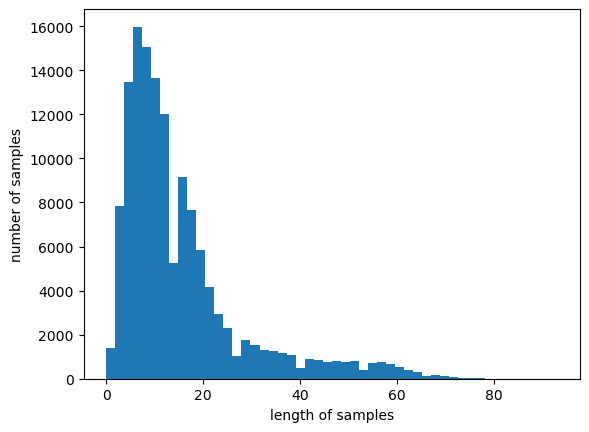

In [241]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [242]:
# max_len 값이 얼마나 많은 리뷰 길이를 커버하는지 확인
def below_threshold_len(max_len, X_train):
  cnt=0
  for sentence in X_train:
    if(len(sentence) <= max_len):
        cnt=cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(X_train))*100))

In [243]:
max_len=40
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 93.21654781414715


In [244]:
X_train=sequence.pad_sequences(X_train, maxlen=max_len)
X_test=sequence.pad_sequences(X_test, maxlen=max_len)

## 학습 및 평가

In [246]:
model=Sequential()
model.add(keras.layers.Input(shape=(max_len, )))
model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=100))
model.add(keras.layers.LSTM(128, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 40, 128)             │       2,902,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           5,121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,907,777 (11.09 MB)

 Trainable params: 2,907,777 (11.09 MB)

 Non-trainable params: 0 (0.00 B)

In [262]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, Y_train, epochs=3, batch_size=64, validation_split=0.2, callbacks=[es])

Epoch 1/3
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.7297 - loss: 0.5234 - val_accuracy: 0.8232 - val_loss: 0.3915
Epoch 2/3
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.8332 - loss: 0.3764 - val_accuracy: 0.8103 - val_loss: 0.4110
Epoch 3/3
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.8511 - loss: 0.3450 - val_accuracy: 0.8374 - val_loss: 0.3748


In [264]:
model.evaluate(X_test, Y_test)

1815/1815 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8328 - loss: 0.3806


[0.38167721033096313, 0.8309907913208008]

## 테스트 

In [267]:
def sentiment_predict(new_sentence):
  new_sentence=re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)           # 정규 표현
  new_sentence=[token.form for token in kiwi.tokenize(new_sentence)]     # 토근화
  new_sentence=[word for word in new_sentence if word not in stopwords]  # 불용어 제거
  encoded=tokenizer.texts_to_sequences([new_sentence])                   # 정수 인코딩
  pad_new=sequence.pad_sequences(encoded, maxlen=max_len)                         # 패딩

  score=float(model.predict(pad_new)[0][0])
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [269]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
67.08% 확률로 긍정 리뷰입니다.


In [270]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
70.96% 확률로 부정 리뷰입니다.


In [271]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
98.56% 확률로 부정 리뷰입니다.


In [272]:
sentiment_predict('감독 뭐하는 놈이냐?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
96.90% 확률로 부정 리뷰입니다.


In [273]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
58.27% 확률로 부정 리뷰입니다.
